<a href="https://colab.research.google.com/github/mnixw/PetSpotR/blob/main/Iris_Series_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install Tensorflow 2.0:
!pip install -q tensorflow==2.15.0rc1

# And verify that it is now in its latest version:
import tensorflow as tf
print(tf.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.3 MB/s eta 0:00:00
2.14.0


In [3]:
# Importing dataset from scikit-learn and other useful packages:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# Fix a random seed for reproducibility:
seed = 11
np.random.seed(seed)

In [17]:
# Import the Iris dataset:
iris = load_iris()

#  Set the features and labels vectors:
x = iris.data # Set x as 'data' from iris
y = iris.target # Set y as 'target' from iris

names = iris.target_names # Set names as 'target_names' from iris
feature_names = iris.feature_names # Set feature_names as 'feature_names' from iris

# Match target data with species name
species_names = [names[target] for target in y]

# Load some elements to verify the contents in the dataset:
elements_to_display = [0,50,100]
for element in elements_to_display:
    print(f"Element {element}th:")
    print(f"  - Features: {x[element]}")
    print(f"  - Target: {y[element]}")
    print(f"  - Species: {species_names[element]}")
    print()

Element 0th:
  - Features: [5.1 3.5 1.4 0.2]
  - Target: 0
  - Species: setosa

Element 50th:
  - Features: [7.  3.2 4.7 1.4]
  - Target: 1
  - Species: versicolor

Element 100th:
  - Features: [6.3 3.3 6.  2.5]
  - Target: 2
  - Species: virginica



In [18]:
from tensorflow import keras

In [20]:
# One hot encode outputs:
y = keras.utils.to_categorical(y)

In [22]:
# Set global variables:
n_features = len(feature_names)
n_classes = names.shape[0]

In [26]:
# Let's checkout changes:
for element in elements_to_display:
    print(f"Element {element}th:")
    print(f"  - Features: {x[element]}")
    print(f"  - Target: {y[element]}")
    print(f"  - Species: {species_names[element]}")
    print()

Element 0th:
  - Features: [5.1 3.5 1.4 0.2]
  - Target: [1. 0. 0.]
  - Species: setosa

Element 50th:
  - Features: [7.  3.2 4.7 1.4]
  - Target: [0. 1. 0.]
  - Species: versicolor

Element 100th:
  - Features: [6.3 3.3 6.  2.5]
  - Target: [0. 0. 1.]
  - Species: virginica



In [27]:
# Split the data set into training and testing sets:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=seed)

In [32]:
y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [34]:
# Let's import our Keras stuff:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def iris_model(input_dim, output_dim, init_nodes=4, name='model'):
    """FF-MLP model for Iris classification problem."""

    # Create model:
    model = Sequential(name=name)
    # Add Dense -> init_nodes, input_dim=input_dim, activation='relu'
    model.add(Dense(init_nodes, input_dim=input_dim, activation='relu'))
    # Add Dense -> 2*init_nodes, activation='relu'
    model.add(Dense(2*init_nodes, activation='relu'))
    # Add Dense -> 3*init_nodes, activation='relu'
    model.add(Dense(3*init_nodes, activation='relu'))
    # Add Dense -> output_dim, activation='softmax'
    model.add(Dense(output_dim, activation='softmax'))

    # Compile model:
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])


    return model

In [37]:
model = iris_model(input_dim=4, output_dim=3)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 12)                108       
                                                                 
 dense_3 (Dense)             (None, 3)                 39        
                                                                 
Total params: 207 (828.00 Byte)
Trainable params: 207 (828.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
# Set hyperparameters
epochs = 10
batch = 32

# Fit the model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    verbose=True,
                    epochs=epochs, batch_size=batch)

Epoch 1/10


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/4 [======>.......................] - ETA: 11s - loss: 1.1394 - accuracy: 0.4062

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4/4 [==============================] - 4s 131ms/step - loss: 1.1447 - accuracy: 0.3429 - val_loss: 1.1510 - val_accuracy: 0.3111
Epoch 2/10
4/4 [==============================] - 0s 18ms/step - loss: 1.1365 - accuracy: 0.3429 - val_loss: 1.1408 - val_accuracy: 0.3111
Epoch 3/10
4/4 [==============================] - 0s 12ms/step - loss: 1.1293 - accuracy: 0.3429 - val_loss: 1.1327 - val_accuracy: 0.3111
Epoch 4/10
4/4 [==============================] - 0s 12ms/step - loss: 1.1238 - accuracy: 0.3810 - val_loss: 1.1261 - val_accuracy: 0.3778
Epoch 5/10
4/4 [==============================] - 0s 19ms/step - loss: 1.1182 - accuracy: 0.3810 - val_loss: 1.

In [39]:
# Final evaluation of the model:
scores = model.evaluate(x_test, y_test, verbose=1)
print(f'Test accuracy: {scores[1]}')

2/2 [==============================] - 0s 11ms/step - loss: 1.0884 - accuracy: 0.5333
Test accuracy: 0.5333333611488342


In [40]:
scores # (the computed loss value, test accuracy)

[1.088437795639038, 0.5333333611488342]

In [41]:
def plot_loss(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's training loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


def plot_accuracy(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Model's training accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

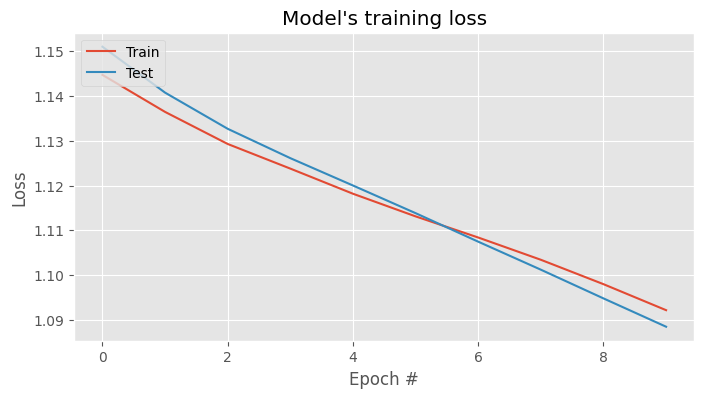

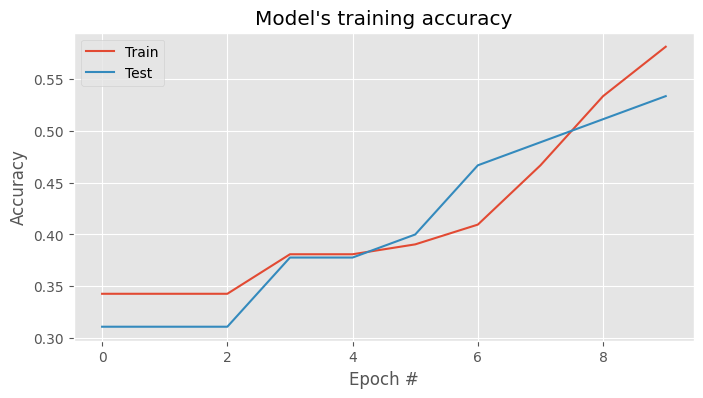

In [42]:
plot_loss(history)
plot_accuracy(history)

In [43]:
# Serialize model to JSON:
model_json = model.to_json()
with open("iris_model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5 (h5py needed):
model.save_weights("iris_model.h5")
print("Model saved to disk.")

Model saved to disk.


In [44]:
from google.colab import files

model_files = ['iris_model.json', 'iris_model.h5']
for file in model_files:
    files.download(file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
# Load json and create model:
from tensorflow.keras.models import model_from_json

json_file = open('iris_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load weights into loaded model:
loaded_model.load_weights("iris_model.h5")
print("Model loaded from disk.")

Model loaded from disk.


In [46]:
# Evaluate loaded model on test data:
loaded_model.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

score = loaded_model.evaluate(x_test, y_test, verbose=1)
print(f'Test accuracy: {score[1]}')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 [==============================] - 0s 16ms/step - loss: 1.0884 - accuracy: 0.5333
Test accuracy: 0.5333333611488342


In [47]:
# Remembering some elements:
for element in elements_to_display:
    prediction_vector = model.predict(np.array([x[element]]))
    print(f"Element {element}th:")
    print(f"  - Features: {x[element]}")
    print(f"  - Target: {y[element]}")
    print(f"  - Scpecies: {names[np.argmax(y[element])]}")
    print(f"  - Predicted species: {names[np.argmax(prediction_vector)]}")
    print()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 119ms/step
Element 0th:
  - Features: [5.1 3.5 1.4 0.2]
  - Target: [1. 0. 0.]
  - Scpecies: setosa
  - Predicted species: setosa

1/1 [==============================] - 0s 22ms/step
Element 50th:
  - Features: [7.  3.2 4.7 1.4]
  - Target: [0. 1. 0.]
  - Scpecies: versicolor
  - Predicted species: versicolor

1/1 [==============================] - 0s 21ms/step
Element 100th:
  - Features: [6.3 3.3 6.  2.5]
  - Target: [0. 0. 1.]
  - Scpecies: virginica
  - Predicted species: versicolor

